In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Activation, Add, GlobalAveragePooling2D, Dense, Dropout, LeakyReLU
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import ReLU
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import pandas as pd
import numpy as np
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
df = pd.read_csv('drive/MyDrive/image_data.csv')

image_pixels = df.iloc[:, 1:].values.astype('uint8')

image_pixels = image_pixels.reshape((-1, 150, 150, 1))

labels = df.iloc[:, 0].values

datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=True
)

augmented_images = []
new_labels = []
for i in range(len(image_pixels)):
    image = image_pixels[i]
    label = labels[i]

    image = np.expand_dims(image, axis=0)

    augmented_images.extend(datagen.flow(image, batch_size=1)[0] for _ in range(10))

    augmented_images.append(image)
    new_labels = np.append(new_labels, [label] * 11)



In [ ]:
augmented_df = pd.DataFrame({'label': new_labels})

augmented_images = [image.reshape((-1,)) for image in augmented_images]
augmented_images_df = pd.DataFrame(augmented_images)

augmented_df = pd.concat([augmented_df, augmented_images_df], axis=1)

augmented_df.to_csv('drive/MyDrive/augmented_data.csv', index=False)

In [ ]:
df = pd.read_csv('drive/MyDrive/augmented_data.csv')
X = df.iloc[:, :150*150].values.reshape(-1, 150, 150, 1)
y = df.iloc[:, 0].values
y.shape

(3850,)

In [ ]:
X.shape

(3850, 150, 150, 1)

In [ ]:
label_counts = df['label'].value_counts()


print(label_counts)

1.0     363
11.0    341
2.0     275
3.0     275
7.0     275
8.0     275
0.0     264
4.0     253
10.0    231
5.0     220
6.0     220
9.0     220
12.0    220
13.0    209
14.0    209
Name: label, dtype: int64


In [ ]:
print(np.unique(y))

y = to_categorical(y)
X_train,X_val,y_train,y_val=train_test_split(X, y, random_state=42, test_size=0.15)
X_train,X_test,y_train,y_test=train_test_split(X_train, y_train, random_state=42, test_size=0.15)

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14.]


In [ ]:
model = Sequential()

model.add(Conv2D(8, kernel_size=3, activation='relu', input_shape=(150, 150, 1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))


model.add(Conv2D(16, kernel_size=5, padding='same', activation='leaky_relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(32, kernel_size=3, activation='leaky_relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, kernel_size=3, activation='leaky_relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128, activation='leaky_relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(15, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 8)       80        
                                                                 
 batch_normalization_5 (Bat  (None, 148, 148, 8)       32        
 chNormalization)                                                
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 74, 74, 8)         0         
 g2D)                                                            
                                                                 
 dropout_5 (Dropout)         (None, 74, 74, 8)         0         
                                                                 
 conv2d_5 (Conv2D)           (None, 74, 74, 16)        3216      
                                                                 
 batch_normalization_6 (Bat  (None, 74, 74, 16)       

In [ ]:
learning_rate = 0.0004
optimizer = Adam(learning_rate=learning_rate)

model.compile(loss='categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [ ]:
X_train.shape[0]
y_train.shape

(2781, 15)

In [ ]:
model_history = model.fit(X_train,y_train,epochs=60,validation_data=(X_val, y_val)
, verbose=2,
                        batch_size=120)

Epoch 1/60
24/24 - 95s - loss: 2.9275 - accuracy: 0.1690 - val_loss: 5.9084 - val_accuracy: 0.0536 - 95s/epoch - 4s/step
Epoch 2/60
24/24 - 2s - loss: 2.2544 - accuracy: 0.2913 - val_loss: 3.8079 - val_accuracy: 0.1107 - 2s/epoch - 67ms/step
Epoch 3/60
24/24 - 2s - loss: 2.0363 - accuracy: 0.3599 - val_loss: 3.0292 - val_accuracy: 0.1453 - 2s/epoch - 68ms/step
Epoch 4/60
24/24 - 2s - loss: 1.8638 - accuracy: 0.4060 - val_loss: 2.4906 - val_accuracy: 0.1903 - 2s/epoch - 72ms/step
Epoch 5/60
24/24 - 2s - loss: 1.7755 - accuracy: 0.4272 - val_loss: 2.2924 - val_accuracy: 0.2509 - 2s/epoch - 66ms/step
Epoch 6/60
24/24 - 2s - loss: 1.6669 - accuracy: 0.4725 - val_loss: 2.1920 - val_accuracy: 0.2647 - 2s/epoch - 66ms/step
Epoch 7/60
24/24 - 2s - loss: 1.5688 - accuracy: 0.4872 - val_loss: 2.0458 - val_accuracy: 0.3131 - 2s/epoch - 69ms/step
Epoch 8/60
24/24 - 2s - loss: 1.4683 - accuracy: 0.5085 - val_loss: 1.9908 - val_accuracy: 0.3322 - 2s/epoch - 66ms/step
Epoch 9/60
24/24 - 2s - loss: 1.

In [ ]:
model.evaluate(X_test, y_test)

16/16 [==============================] - 0s 6ms/step - loss: 0.9354 - accuracy: 0.7373


[0.935356855392456, 0.7372708916664124]

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, fbeta_score, confusion_matrix

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

print(y_test.shape)
print(y_pred_classes.shape)
y_test = np.argmax(y_test, axis=1)
accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes, average='weighted')
recall = recall_score(y_test, y_pred_classes, average='weighted')
f2_score = fbeta_score(y_test, y_pred_classes, beta=2, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F2-Score:", f2_score)

16/16 [==============================] - 0s 5ms/step
(491, 15)
(491,)
Accuracy: 0.7372708757637475
Precision: 0.7631328203236093
Recall: 0.7372708757637475
F2-Score: 0.7352391684513676


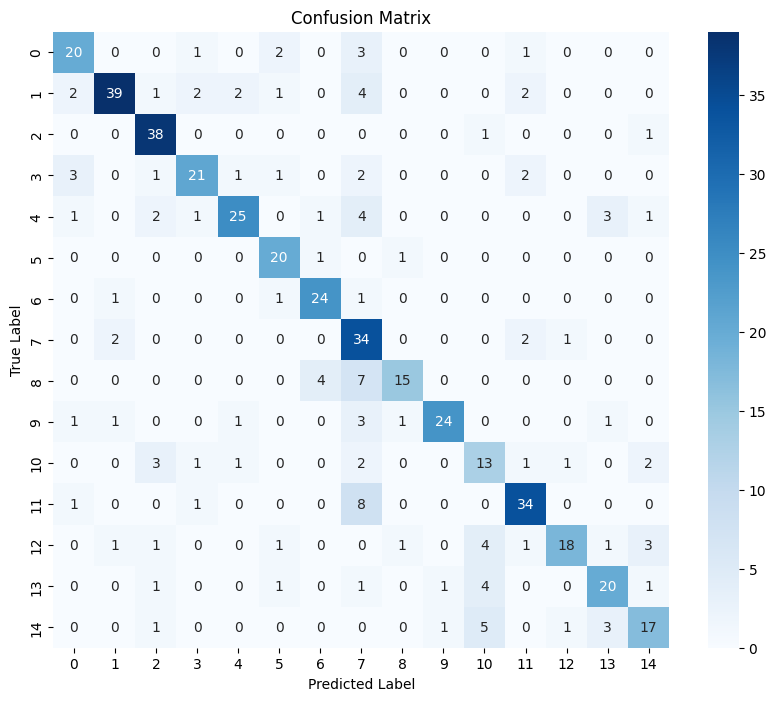

In [ ]:
cm = confusion_matrix(y_test, y_pred_classes)

classes = np.unique(y_test)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True, square=True,
            xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

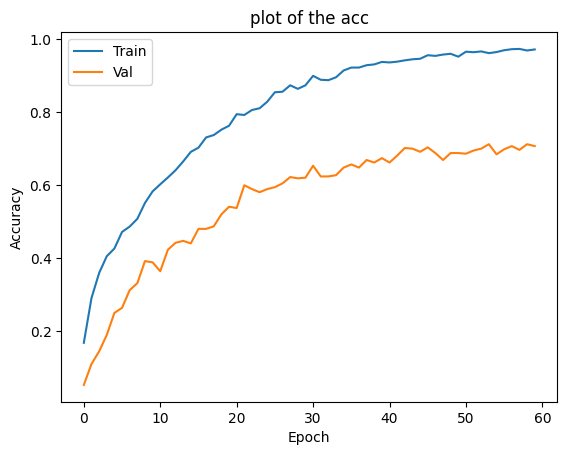

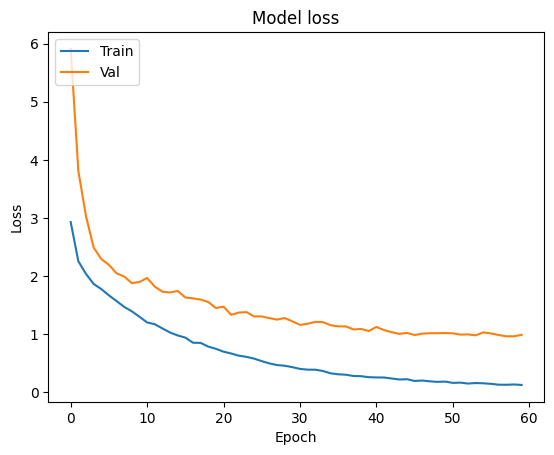

In [ ]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('plot of the acc')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

491
1/1 [==============================] - 0s 18ms/step


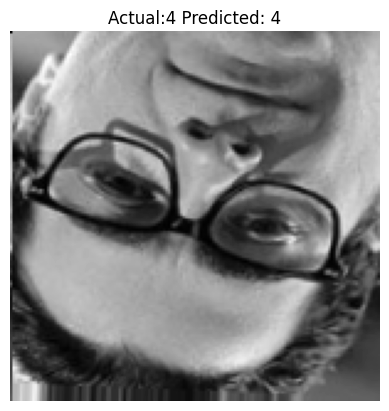

In [ ]:
print(X_test.shape[0])

rand_n = np.random.randint(X_test.shape[0])

plt.imshow(X_test[rand_n][:, :, 0], cmap='gray')
plt.title(f'Actual:{y_test[rand_n]} Predicted: {np.argmax(model.predict(X_test[rand_n].reshape(-1, 150, 150, 1)))}');
plt.axis('off')
plt.show()

In [ ]:

import h5py
import numpy as np

f = h5py.File("drive/MyDrive/model_weights.weights.hdf5", "w")
f.close()
model.save_weights("drive/MyDrive/model_weights.weights.hdf5")


1/1 [==============================] - 0s 18ms/step
[[6.1791957e-07 9.9351221e-01 3.0578460e-06 1.3594491e-05 6.8054309e-05
  4.9456877e-10 4.7366807e-06 1.5869875e-03 1.1067353e-04 4.6564047e-03
  8.6983025e-09 3.5441386e-07 2.4101450e-08 1.6957248e-06 4.1528459e-05]]
[1]


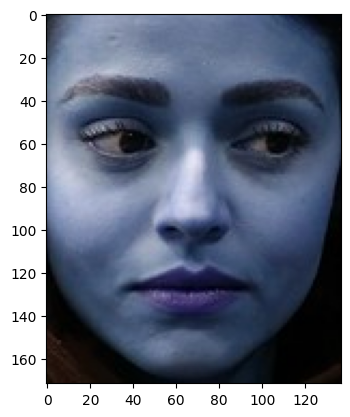

In [ ]:
import cv2
image = cv2.imread("drive/MyDrive/sog2.jpg")
img = cv2.resize(image, (150, 150))
num_channels = img.shape[-1]
if num_channels == 3:
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
else:
    img = img
img = img.astype('float32') / 255.0
img = np.expand_dims(img, axis=-1)

predictions = model.predict(np.array(img).reshape(-1,150,150,1))
print(predictions)
predicted_labels = np.argmax(predictions, axis=1)
print(predicted_labels)
plt.imshow(image)
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
